<a href="https://colab.research.google.com/github/Sathishkumarmc/mtstaticwebpage/blob/main/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
data_fake["label"] = 0
data_true["label"] = 1

In [ ]:
data = pd.concat([data_fake, data_true], axis=0)
data = data.sample(frac=1).reset_index(drop=True)



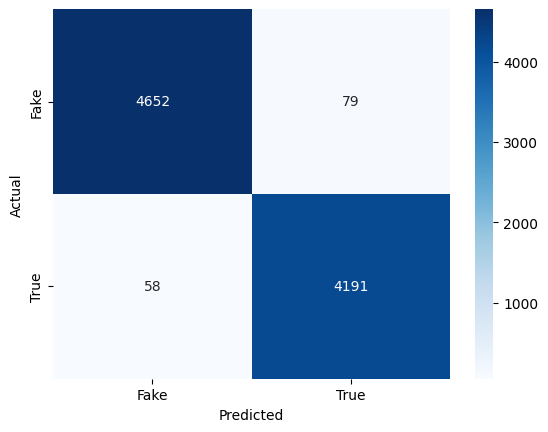

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
X = data["text"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_vec)

In [ ]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.9847438752783965

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4731
           1       0.98      0.99      0.98      4249

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [ ]:

!pip install -q kaggle
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset -p /content/
!unzip -o /content/fake-and-real-news-dataset.zip -d /content/



Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open /content/fake-and-real-news-dataset.zip, /content/fake-and-real-news-dataset.zip.zip or /content/fake-and-real-news-dataset.zip.ZIP.


In [ ]:

!pip install -q kaggle
!mv "kaggle (2).json" kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset -p /content/
!unzip -o /content/fake-and-real-news-dataset.zip -d /content/
!ls /content


Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 1.16GB/s]
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: /content/Fake.csv       
  inflating: /content/True.csv       
 drive				  Fake.csv		 kaggle.json   True.csv
 fake-and-real-news-dataset.zip  'kaggle (2) (1).json'	 sample_data


In [ ]:
import pandas as pd

data_fake = pd.read_csv('/content/Fake.csv')
data_true = pd.read_csv('/content/True.csv')

print("Fake news shape:", data_fake.shape)
print("True news shape:", data_true.shape)


Fake news shape: (23481, 4)
True news shape: (21417, 4)


In [2]:

!pip install transformers -q
!pip install tensorflow -q
!pip install scikit-learn -q
!pip install safetensors -q
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
X = ["This is good", "This is bad", "I love it", "I hate it"]
y = [1, 0, 1, 0]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train = [str(x) for x in X_train]
X_test = [str(x) for x in X_test]
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
train_encodings = tokenizer(
    X_train,
    truncation=True,
    padding=True,
    max_length=256,
    return_tensors="tf"
)

test_encodings = tokenizer(
    X_test,
    truncation=True,
    padding=True,
    max_length=256,
    return_tensors="tf"
)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        "input_ids": train_encodings["input_ids"],
        "attention_mask": train_encodings["attention_mask"]
    },
    y_train_tf
)).shuffle(100).batch(8)

test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        "input_ids": test_encodings["input_ids"],
        "attention_mask": test_encodings["attention_mask"]
    },
    y_test_tf
)).batch(8)
bert_model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2,
    from_pt=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

bert_model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=["accuracy"]
)
bert_model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=2
)
loss, acc = bert_model.evaluate(test_dataset)
print(f"✅ BERT Model Accuracy: {acc:.2f}")


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
1/1 [==============================] - 43s 43s/step - loss: 0.7096 - accuracy: 0.3333 - val_loss: 0.4906 - val_accuracy: 1.0000
Epoch 2/2
1/1 [==============================] - 0s 90ms/step - loss: 0.5527 - accuracy: 1.0000
✅ BERT Model Accuracy: 1.00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 5000
max_len = 300
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len)
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test), verbose=1)
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ LSTM Model Accuracy: {acc:.2f}")


Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


562/562 ━━━━━━━━━━━━━━━━━━━━ 720s 1s/step - accuracy: 0.9154 - loss: 0.1925 - val_accuracy: 0.9864 - val_loss: 0.0441
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 649s 1s/step - accuracy: 0.9819 - loss: 0.0529 - val_accuracy: 0.9867 - val_loss: 0.0433
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 685s 1s/step - accuracy: 0.9829 - loss: 0.0525 - val_accuracy: 0.9903 - val_loss: 0.0299
✅ LSTM Model Accuracy: 0.99
